# Analysis on My Job/Internship Search For Summer 2024

## Overview

Since early July 2023, I have been constantly working on this project called applying for summer internships. For anyone, this is not a fun process, it is draining and demoralizing to see follow-ups entailing the words "we have decided to pursue a different candidate" or "we will not be moving forward with your application". The internship application process is a brutal process for students around this time in Fall, especially with how the job market not currently doing so well.

For roughly 4.5 months, I have been pushing myself to apply for summer internships everyday. Just to briefly highlight how competitive job hunting is, I had to apply to 1,964 summer internship applications within the span of roughly 4.5 months to finally receive one acceptance. Because of the vast number of applications, I also received a fair amount of behavioral/technical calls and interviews. However, as expected, all of these either resulted in rejections or a "ghost".

By no means my shared experience is intended to discourage anyone from applying to summer roles. I made this repository to shed light and insight based on my education and career background. Hopefully, people in a similar boat as me can take away something helpful from this repository.

## Background

Some context about me during my job hunt, I am currently a fourth year Bachelor's student at UCSD majoring in Electrical Engineering and minoring in Cognitive Science, and I am also an incoming Master's student in Electrical Engineering. My career goal is to pursue something in software development or data science. The majority of internship roles I applied to were within the tech and software track, yet the tech job market is ridiculously saturated and competitive. The odds definitely felt against me, especially coming from a non-CS background. In fact, the one acceptance I received was a quality engineering intern role at Texas Instruments.

I also used [Simplify's Summer2024-InternshipsPublic](https://github.com/SimplifyJobs/Summer2024-Internships) repository which was THE ultimate curated job listing site for tech internships. Curated job sites like these are known to get flooded and competitive. Applying to jobs is like a dating app, unless you *know* you are a top-tier applicant.

## Rebuttals

Before laying my analysis on my job search experience, I do want to address potential responses and thoughts, such as why did I keep applying after putting hundreds of applications or why did I keep using curated job sites like LinkedIn or Simplify to find internships despite being aware of the mean competition.

My Answer: Because I believe in the numbers game. Personally, whether its applying to tens, hundreds, or thousands roles, I would still pile more applications just to raise my chances in the long-run. If five minutes of my day is what it takes for me to become one application closer to an offer or a summer's worth of work experience, I would unhesitatingly squeeze as many applications everyday. After a hundred or so, it starts becoming an effortless daily routine. While it may sound pointless in mass applying from curated sites with top-tier companies, submitting an application at least puts you in a better position than not. I was also inspired by the student tech content creators on TikTok and YouTube, as they typically share about their experience in applying and working for MAANG companies despite their humble backgrounds. Although the 4.0 GPA Leetcode grinder with +10 hackathon experience candidate typically sticks out the most to recruiters, there is always that humble and unique few that recruiters consider too. Other factors for the persistent job hunting was that I was heavily invested and interested in keeping up with the tech job market scene, and I already had nothing to lose due to a summer return offer from my previous company.

## Libraries/Imports

Import the following packages. To get all the packages run `pip install -r requirements.txt`

In [1]:
#!pip install -r requirements.txt

In [2]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', rc={'lines.linewidth': '0.3'})
sns.set_palette('pastel')

import os.path

## Fetching My Job Tracking Dataset

I will personally fetch the data using the Google Sheets API on my local machine. Alternatively, the dataset is also available in the repository (however, it may not be up to date).

In [3]:
USE_DATESET = False
credentials = 'token.json'

if os.path.isfile(credentials) and USE_DATESET:
    
    # Start Google Sheets API requests
    import gspread
    from oauth2client.service_account import ServiceAccountCredentials

    # Sheets scope
    SCOPES = ['https://www.googleapis.com/auth/spreadsheets',
              'https://www.googleapis.com/auth/drive',
              'https://www.googleapis.com/auth/drive.file',
              'https://spreadsheets.google.com/feeds']
    
    creds = ServiceAccountCredentials.from_json_keyfile_name(credentials, SCOPES)
    online_client = gspread.authorize(creds)

    sheet = online_client.open('Applications').sheet1
    
    # Get all data
    data = sheet.get_all_values()
    
    # Remove title block and get column names
    data.pop(0)
    columns = data.pop(0)
    
    df = pd.DataFrame(data, columns=columns) 
    
else:
    df = pd.read_csv('./data/raw/applications.csv', skiprows=[0])

In [4]:
# Preview
df.head()

,Company,Stage,Date,Position,Posting URL
0,Skyworks,Applied,7/6/2023 21:40,Product & Test Engineering Intern,https://careers.skyworksinc.com/job/Irvine-Pro...
1,Tesla,Applied,7/6/2023 22:04,Tesla x UC-San Diego– Engineering Internships ...,https://ucsd.joinhandshake.com/stu/postings?pa...
2,Enphase Energy,Applied,7/6/2023 23:05,Embedded Firmware Engineer Intern,https://jobs.jobvite.com/enphase-energy/job/oF...
3,JPMorgan Chase & Co,Rejected,7/6/2023 23:14,SOFTWARE ENGINEER PROGRAM – SUMMER INTERNSHIP ...,https://jpmc.fa.oraclecloud.com/hcmUI/Candidat...
4,Elbit Systems,Rejected,7/6/2023 23:28,Software Engineering Intern,https://jobs.smartrecruiters.com/ElbitSystemsO...


## Data Cleaning

In [5]:
# Validate predefined 'stages'
df['Stage'].unique()

array(['Applied', 'Rejected', 'Rejected-Interview', 'Applied-Interview',
       'Ready to Apply', 'Offered'], dtype=object)

In [6]:
# Standardize and validate company names for potential similarities or mispellings
companies_freeze = df['Company'].unique()
df['Company'] = df['Company'].apply(lambda name: name.lower().strip())

companies = df['Company'].unique()

# Easier to validate manually, simple ctrl + f on google sheets
# Could also look at similarities based on posting URL but ehhh...
standardized = list(set(map(lambda name: name.lower(), companies)))
sorted(standardized)

['84.51°',
 'abl',
 'abl space systems',
 'accelbyte',
 'accenture federal services',
 'activision',
 'adobe',
 'aerovironment',
 'affinipay',
 'akuna capital',
 'alchemy',
 'alcon',
 'allegion',
 'alluxio',
 'amazon',
 'ambarella',
 'amd',
 'american express',
 'ametek',
 'amgen',
 'ancestry',
 'anduril industries',
 'anyscale',
 'appian',
 'apple',
 'applied materials',
 'aqr',
 'aqr capital management',
 'arista',
 'ark biotech',
 'arm',
 'arrowstreet capital',
 'arsenalbio',
 'arup',
 'asana',
 'asm',
 'asml',
 'at&t',
 'athelas',
 'athenahealth',
 'atlassian',
 'aurora',
 'autodesk',
 'aveva',
 'badge meter',
 'badger meter',
 'bae systems',
 'bank of america',
 'barclays',
 'bayer',
 'beacon platform',
 'belvedere trading llc',
 'benchling',
 'bhg financial',
 'black rock',
 'blackstone',
 'blizzard',
 'bloom energy',
 'blue origin',
 'bnsf',
 'boeing',
 'bose',
 'branch',
 'braze',
 'bristol myers squibb',
 'bristol-myers squibb',
 'broadridge',
 'c3 ai',
 'caci',
 'calix',
 'ca

In [7]:
# Standardize recorded datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [8]:
df.head()

,Company,Stage,Date,Position,Posting URL
0,skyworks,Applied,2023-07-06 21:40:00,Product & Test Engineering Intern,https://careers.skyworksinc.com/job/Irvine-Pro...
1,tesla,Applied,2023-07-06 22:04:00,Tesla x UC-San Diego– Engineering Internships ...,https://ucsd.joinhandshake.com/stu/postings?pa...
2,enphase energy,Applied,2023-07-06 23:05:00,Embedded Firmware Engineer Intern,https://jobs.jobvite.com/enphase-energy/job/oF...
3,jpmorgan chase & co,Rejected,2023-07-06 23:14:00,SOFTWARE ENGINEER PROGRAM – SUMMER INTERNSHIP ...,https://jpmc.fa.oraclecloud.com/hcmUI/Candidat...
4,elbit systems,Rejected,2023-07-06 23:28:00,Software Engineering Intern,https://jobs.smartrecruiters.com/ElbitSystemsO...


## Exploratory Data Analysis

First examine the distribution of `stages`. We can obtain an 'average' interview to application ratio.

In [9]:
df['Stage'].value_counts()

Applied               1311
Rejected               634
Rejected-Interview      37
Applied-Interview       31
Ready to Apply          12
Offered                  3
Name: Stage, dtype: int64

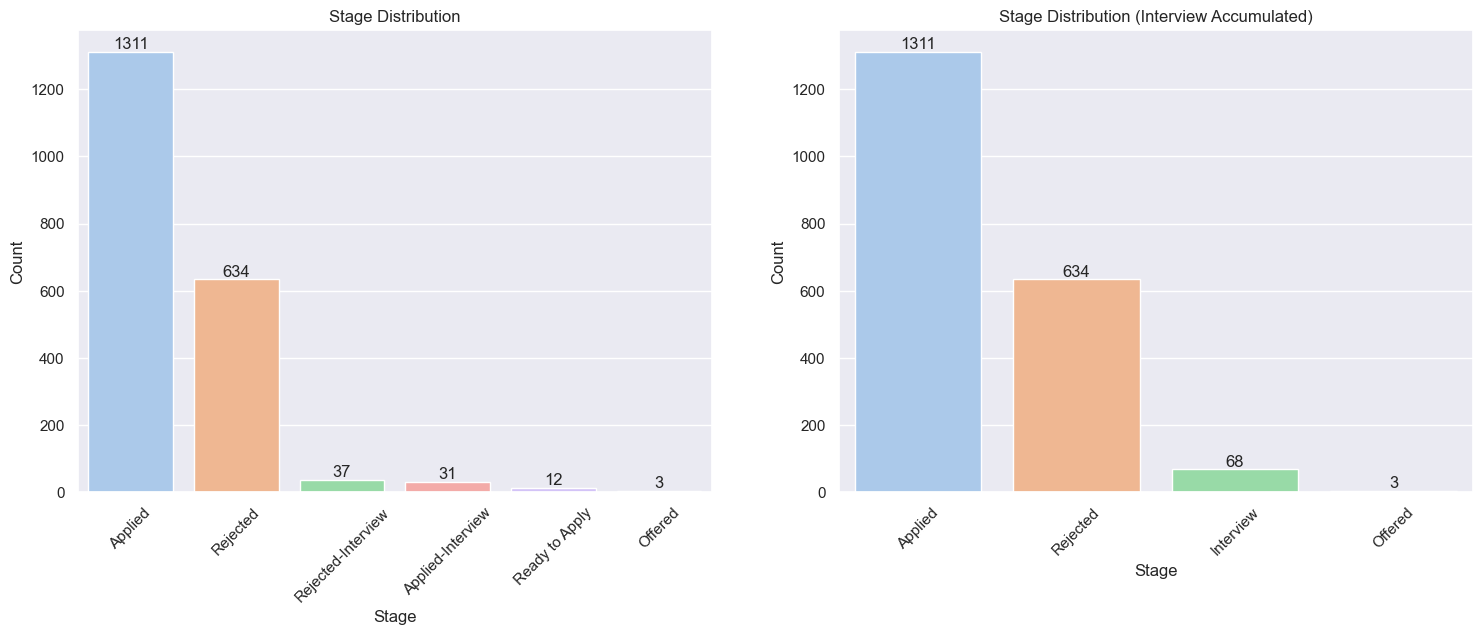

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# All stages
abs_values = df['Stage'].value_counts(ascending=False)
distribution1 = sns.countplot(x='Stage', data=df, order=abs_values.index, ax=axes[0])

distribution1.set_title('Stage Distribution')
distribution1.set_xlabel('Stage')
distribution1.set_ylabel('Count')
distribution1.tick_params(axis='x', rotation=45)

distribution1.bar_label(container=distribution1.containers[0], labels=abs_values.values)

# Interviews, rejections, and offers only
stage_freeze = {'Applied': 0, 'Rejected': 0, 'Interview': 0, 'Offered': 0}

for stage in df['Stage']:
    if 'Interview' in stage:
        stage_freeze['Interview'] += 1
        
    elif stage == 'Applied':
        stage_freeze['Applied'] += 1
        
    elif stage == 'Rejected':
        stage_freeze['Rejected'] += 1
        
    elif stage == 'Offered':
        stage_freeze['Offered'] += 1
        
keys = list(stage_freeze.keys())
values = [stage_freeze[i] for i in keys]
distribution2 = sns.barplot(x=keys, y=values, ax=axes[1])

distribution2.set_title('Stage Distribution (Interview Accumulated)')
distribution2.set_xlabel('Stage')
distribution2.set_ylabel('Count')
distribution2.tick_params(axis='x', rotation=45)

distribution2.bar_label(container=distribution2.containers[0], labels=values)

plt.show()

Overall performance in rejection, interview, and offer rate.

In [11]:
offer_rate = stage_freeze['Offered'] / sum(values)
print(f'Offer rate: {offer_rate*100: .3f}%')

interview_rate = stage_freeze['Interview'] / sum(values)
print(f'Interview rate: {interview_rate*100: .3f}%')

rejection_rate = stage_freeze['Rejected'] / sum(values)
print(f'Rejection rate: {rejection_rate*100: .3f}%')

Offer rate:  0.149%
Interview rate:  3.373%
Rejection rate:  31.448%


Use our datetimes for good use. We can roughly correct for old applications still staged at `Applied` and label it as a ghost or even a rejection.

In [12]:
# Any applications still staged as 'Applied' after this generous x days threshold will be considered a ghost
ghosts_threshold = 21
ghosts_stage = []

now = pd.Timestamp.now()
for index, row in df.iterrows():
    stage = row['Stage']
    datetime = row['Date']
    
    if stage == 'Applied' and (now - datetime).days > ghosts_threshold:
        ghosts_stage.append('Ghosted')
        
    else:
        ghosts_stage.append(stage)
    
# New dataframe with 'Ghosted' stage
df_ghosts = df.copy()
df_ghosts['Stage'] = ghosts_stage

See new `Stage` distribution. It appears that a signficant portion of `Applied` staged applications are considered a ghost by this thresholding standard.

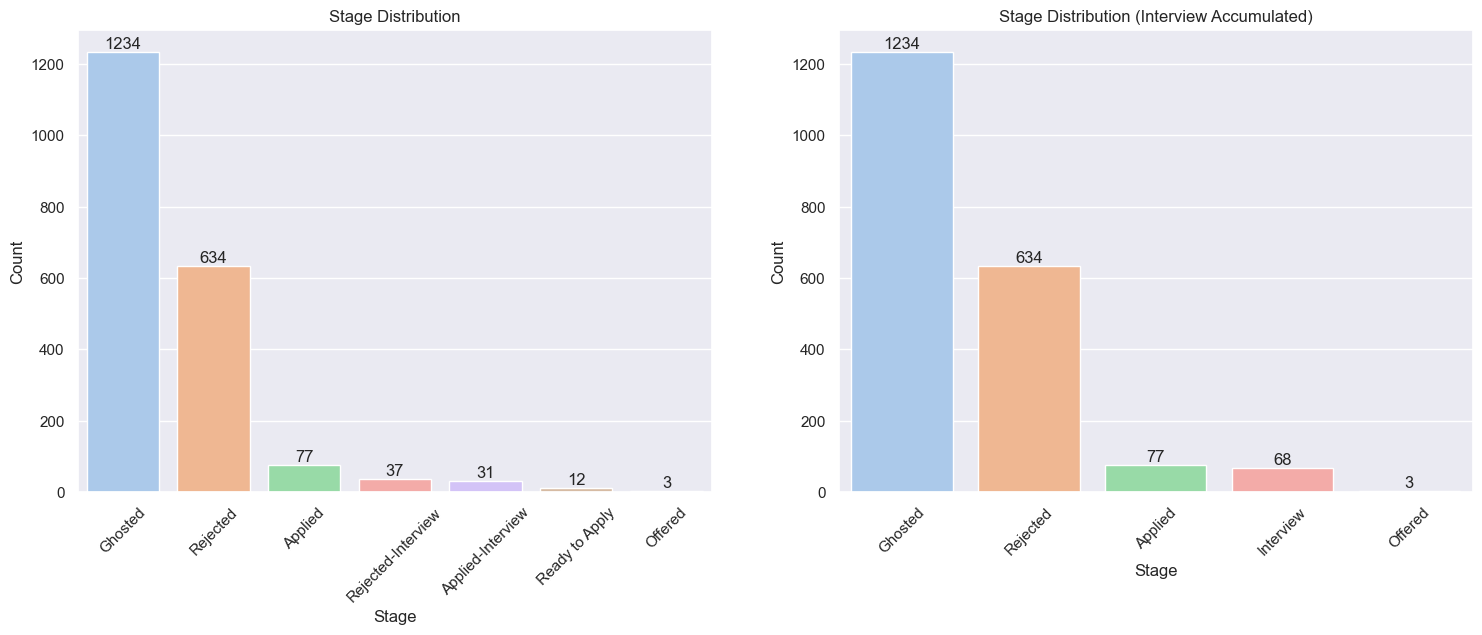

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# All stages
abs_values = df_ghosts['Stage'].value_counts(ascending=False)
distribution1 = sns.countplot(x='Stage', data=df_ghosts, order=abs_values.index, ax=axes[0])

distribution1.set_title('Stage Distribution')
distribution1.set_xlabel('Stage')
distribution1.set_ylabel('Count')
distribution1.tick_params(axis='x', rotation=45)

distribution1.bar_label(container=distribution1.containers[0], labels=abs_values.values)

# Interviews, rejections, and offers only
stage_freeze = {'Ghosted': 0, 'Rejected': 0, 'Applied': 0, 'Interview': 0, 'Offered': 0}

for stage in df_ghosts['Stage']:
    if 'Interview' in stage:
        stage_freeze['Interview'] += 1
        
    elif stage == 'Applied':
        stage_freeze['Applied'] += 1
        
    elif stage == 'Ghosted':
        stage_freeze['Ghosted'] += 1
        
    elif stage == 'Rejected':
        stage_freeze['Rejected'] += 1
        
    elif stage == 'Offered':
        stage_freeze['Offered'] += 1
        
keys = list(stage_freeze.keys())
values = [stage_freeze[i] for i in keys]
distribution2 = sns.barplot(x=keys, y=values, ax=axes[1])

distribution2.set_title('Stage Distribution (Interview Accumulated)')
distribution2.set_xlabel('Stage')
distribution2.set_ylabel('Count')
distribution2.tick_params(axis='x', rotation=45)

distribution2.bar_label(container=distribution2.containers[0], labels=values)

plt.show()

In [14]:
ghosted_rate = stage_freeze['Ghosted'] / sum(values)
print(f'Ghost rate: {ghosted_rate*100: .3f}%')

Ghost rate:  61.210%


Find top 10 most applied companies and their roles and rejection ratio.

In [18]:
top_applied.index

Index(['lockheed martin', 'asml', 'northrop grumman', 'adobe', 'tesla',
       'intel', 'elevance health', 'rtx', 'zoox', 'visa'],
      dtype='object')

In [15]:
top_applied = df['Company'].value_counts()[:10]
names = []

for company in top_applied.index:
    for origin in companies_freeze:
        standardized_name = origin.lower().strip()
        
        if company == standardized_name:
            names.append(origin)
    
{key: value for key, value in zip(names, top_applied.values)}

{'Lockheed Martin': 103,
 'ASML': 55,
 'Northrop Grumman': 54,
 'Adobe': 47,
 'Tesla': 43,
 'Intel': 40,
 'Elevance Health': 40,
 'RTX': 35,
 'Zoox': 29,
 'Visa': 24}

In [22]:
df_ghosts[df_ghosts['Company'].isin(top_applied.index)] 

,Company,Stage,Date,Position,Posting URL
1,tesla,Ghosted,2023-07-06 22:04:00,Tesla x UC-San Diego– Engineering Internships ...,https://ucsd.joinhandshake.com/stu/postings?pa...
35,asml,Rejected,2023-07-16 17:04:00,Data Scientist Intern,https://www.asml.com/en/careers/find-your-job/...
80,tesla,Ghosted,2023-08-06 11:15:00,Reliability Engineering Internship (Spring/Sum...,https://www.tesla.com/careers/search/job/relia...
81,tesla,Rejected,2023-08-06 11:17:00,Energy – Software Engineering (Spring/Summer 2...,https://www.tesla.com/careers/search/job/energ...
82,tesla,Ghosted,2023-08-06 11:35:00,Field Test Engineering Internship (Spring/Summ...,https://www.tesla.com/careers/search/job/field...
...,...,...,...,...,...
1980,intel,Applied,2023-11-10 09:49:00,Graphics Software Intern,https://intel.wd1.myworkdayjobs.com/en-us/exte...
1981,intel,Applied,2023-11-10 09:54:00,Technology Development (LTD) Quality and Relia...,https://intel.wd1.myworkdayjobs.com/en-US/exte...
1982,intel,Applied,2023-11-10 09:56:00,Machine Learning Engineer- Graduate Intern,https://intel.wd1.myworkdayjobs.com/en-US/exte...
2016,asml,Applied,2023-11-15 11:12:00,Internship – Software Engineer,https://www.asml.com/en/careers/find-your-job/...


In [17]:
# get frequency of how often i applied (within a day or week or moth)
# how many days consistent until offer
# longest streak
# most companies applied
# rejection rate for top 5 most applied companies
# most common role applied